In [218]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd


In [219]:
data =  pd.read_csv("melb_data.csv")
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [220]:
#remove redundant and irrelevant attributes:
#Address has 13378 unique values, almost unique for each object. Description rather than category, also overlaps with latitude, longitude, regionname
#method simply describes if property was put on auction or sold
data['Address'].value_counts()

36 Aberfeldie St    3
2 Bruce St          3
5 Charles St        3
53 William St       3
14 Arthur St        3
                   ..
16 Alleford St      1
2/1073 Centre Rd    1
14 Columbia St      1
21 Hardy Ct         1
6 Agnes St          1
Name: Address, Length: 13378, dtype: int64

In [221]:
#remove redundant and irrelevant attributes:
#postcode is redundant
data['Postcode'].value_counts()

3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
         ... 
3340.0      1
3158.0      1
3808.0      1
3777.0      1
3793.0      1
Name: Postcode, Length: 198, dtype: int64

In [222]:
#remove redundant and irrelevant attributes:
#method simply describes how the data is obtained (sold, auction), is irrelevant
data = data.drop(columns=['Address','Method','Postcode'])

In [223]:
#data cleaning: checking for duplicates
data.duplicated().sum()

0

In [224]:
#data cleaning: missing values
data.isna().sum()
#missing values for car can be removed as very few, buildingarea, yearbuilt, councilarea needs replacement

Suburb              0
Rooms               0
Type                0
Price               0
SellerG             0
Date                0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [225]:
#data cleaning: missing values
data = data.dropna(subset=['Car'])
data.reset_index(drop=True, inplace=True)
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median())
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())
data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])

In [226]:
#data transformation: yearbuilt to age
data['BuildingAge'] = 2018-data['YearBuilt']
data = data.drop(columns=['YearBuilt'])

In [227]:
#creating features from date sold
data['Date'] = pd.to_datetime(data['Date'])
data['Year_Sold'] = data['Date'].dt.year
data['Month_Sold'] = data['Date'].dt.month
data['Day_Sold'] = data['Date'].dt.day
data['DayOfWeek_Sold'] = data['Date'].dt.dayofweek
data = data.drop(columns=['Date'])
data[['Year_Sold', 'Month_Sold', 'Day_Sold', 'DayOfWeek_Sold']].head()

C:\Users\shiyi\AppData\Local\Temp\ipykernel_17008\273771942.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


,Year_Sold,Month_Sold,Day_Sold,DayOfWeek_Sold
0,2016,3,12,5
1,2016,4,2,5
2,2017,4,3,0
3,2017,4,3,0
4,2016,4,6,2


In [228]:
#encoding categorical attributes
#suburb, SellerG, CouncilArea are nominal, have high cardinality - binary encoder used for memory concerns
#one-hot encoder for other nominal features - better performance (https://www.diva-portal.org/smash/get/diva2:1259073/FULLTEXT01.pdf)
categorical = ['Suburb','Type','SellerG','CouncilArea','Regionname']
for x in categorical:
    print(data[x].value_counts())

Reservoir         359
Richmond          259
Bentleigh East    249
Preston           239
Brunswick         221
                 ... 
Sandhurst           1
Bullengarook        1
Montrose            1
Croydon South       1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64
h    9389
u    3015
t    1114
Name: Type, dtype: int64
Nelson           1558
Jellis           1303
hockingstuart    1160
Barry            1010
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: SellerG, Length: 268, dtype: int64
Moreland             2470
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash          

In [229]:
#encoding categorical attributes
from category_encoders.binary import BinaryEncoder
encoder = BinaryEncoder(cols=['Suburb','SellerG','CouncilArea'], return_df=True)
data_encoded = encoder.fit_transform(data)
type_encoded = pd.get_dummies(data['Type'], prefix='Type')
regionname_encoded = pd.get_dummies(data['Regionname'], prefix='Regionname')
data_encoded = pd.concat([data_encoded, type_encoded, regionname_encoded], axis='columns').drop(['Type','Regionname'],axis=1)

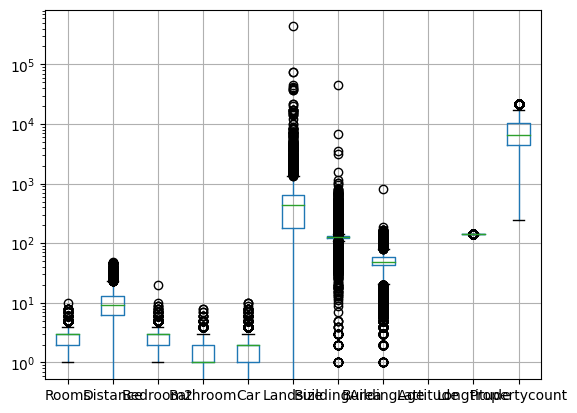

In [230]:
#data transformation: standardization, not normalization, as data contains many outliers
numeric_data = data[['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','BuildingAge','Lattitude','Longtitude','Propertycount']]
plt.yscale("log")
plt.xticks(rotation='vertical')
numeric_data.boxplot()
plt.show()

In [241]:
#train test split before scaling as test set must not influence scaling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_encoded, test_size=0.2, random_state=42)
train_set_y = train_set['Price']
train_set_x = train_set.drop(columns=['Price'])
test_set_y = test_set['Price']
test_set_x = test_set.drop(columns=['Price'])

In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set_x_scaled = train_set_x.copy()
test_set_x_scaled = test_set_x.copy()
numeric_columns = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','BuildingAge','Lattitude','Longtitude','Propertycount']
train_set_x_scaled[numeric_columns] = scaler.fit_transform(train_set_x_scaled[numeric_columns])
test_set_x_scaled[numeric_columns] = scaler.transform(test_set_x_scaled[numeric_columns])

In [240]:
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
train_set_x_reduced = pd.DataFrame(pca.fit_transform(train_set_x_scaled))
test_set_x_reduced = pd.DataFrame(pca.transform(test_set_x_scaled))
print(pca.explained_variance_ratio_)
print(pca.components_)

[1.]
[[-1.41209046e-08 -7.14076875e-08 -7.67964510e-08 -2.17475062e-08
  -1.07841549e-08 -1.03523636e-08 -2.38078921e-08  4.58207076e-08
  -1.09363302e-08  7.81788171e-07  1.00000000e+00 -1.93460507e-11
  -2.30326894e-08 -2.89513517e-08 -5.23298886e-08 -7.14361704e-08
  -6.42184708e-09 -2.35934017e-08 -7.66775159e-09  9.98433552e-08
  -2.46055998e-07  7.44383077e-07  7.26192255e-07  3.69241298e-07
   6.25345478e-08  3.97257350e-07 -1.20790839e-10 -1.10099822e-07
  -3.32472261e-08  1.09383109e-07  2.40124575e-08  1.57582513e-08
  -3.24099964e-07  3.24392768e-07 -6.23762453e-08  4.09887615e-07
   5.04582263e-09  6.34901023e-08 -1.99237581e-07  8.22224642e-08
   2.85488153e-07 -2.65517750e-08 -2.58936378e-07  1.05202653e-08
  -3.63820735e-09 -1.21530831e-07 -3.22593970e-09 -1.19530932e-08
   2.43737569e-07 -1.09937844e-07 -3.97191845e-09]]
